# Dataset



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


X = 4 * np.random.rand(100,1) -2
Y = 4 + 7* X +  + 6*X**2 + 7 * X**3 + 7*np.random.randn(100,1)

# Visualise Data Plot func



In [19]:

def PlotCubic(A,B,C,D):

  X_line = np.linspace(X.min(), X.max(), 100) # Creates 100 evenly spaced points

  # 4. Calculate the predicted Y-values (the regression line)
  Y_pred = (A *X_line**3) + (B *X_line**2) + (C * X_line) + (D)


  # Add titles and labels

  plt.figure(figsize=(10, 6))
  plt.scatter(X, Y)
  plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: {A}X^3 + {B}X^2 + {C}X + {D}')

  plt.title('Years of Experience vs. Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()

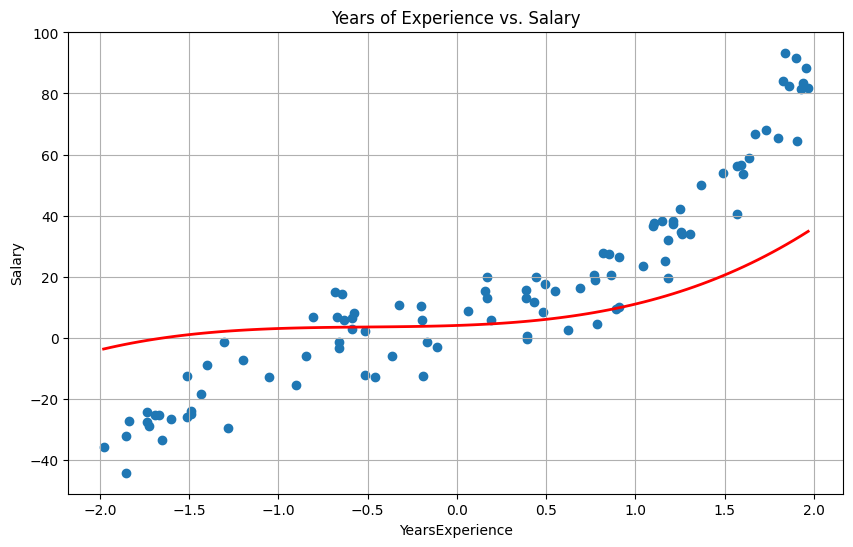

In [20]:
PlotCubic(2,3,2,4)

# Mean Squared Error Calculator

we're using the same data throughout, hence no need of DYNAMIC dynamic functions

In [21]:
def MSE(A,B,C,D):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A *XStream[N]**3) + (B *XStream[N]**2) + (C * XStream[N]) + (D)

    Error = ObservedValue - PredictedValue
    ErrorSquared = Error ** 2

    Summation += ErrorSquared
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return Summation / len(YStream)


In [22]:
MSE(1,2,5,6)

array([586.98702397])

# Partial Derivatives
This is to look at the rate of change of the BiVariate MSE with respects to only 1 Parameter

In [23]:
def PartialDerivativeA(A,B,C,D):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A *XStream[N]**3) + (B *XStream[N]**2) + (C * XStream[N]) + (D)

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N] **3

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)

In [24]:
def PartialDerivativeB(A,B,C,D):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A *XStream[N]**3) + (B *XStream[N]**2) + (C * XStream[N]) + (D)

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N] **2

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)

In [25]:
def PartialDerivativeC(A,B,C,D):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A *XStream[N]**3) + (B *XStream[N]**2) + (C * XStream[N]) + (D)

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N]

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)

In [26]:
def PartialDerivativeD(A,B,C,D):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A *XStream[N]**3) + (B *XStream[N]**2) + (C * XStream[N]) + (D)

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)

In [27]:
def PartialDerivativeD1(A,B,C,D,ExponentOfDersTerm):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A *XStream[N]**3) + (B *XStream[N]**2) + (C * XStream[N]) + (D)

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N] ** ExponentOfDersTerm

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)

# Gradient Descent Iteration Steps

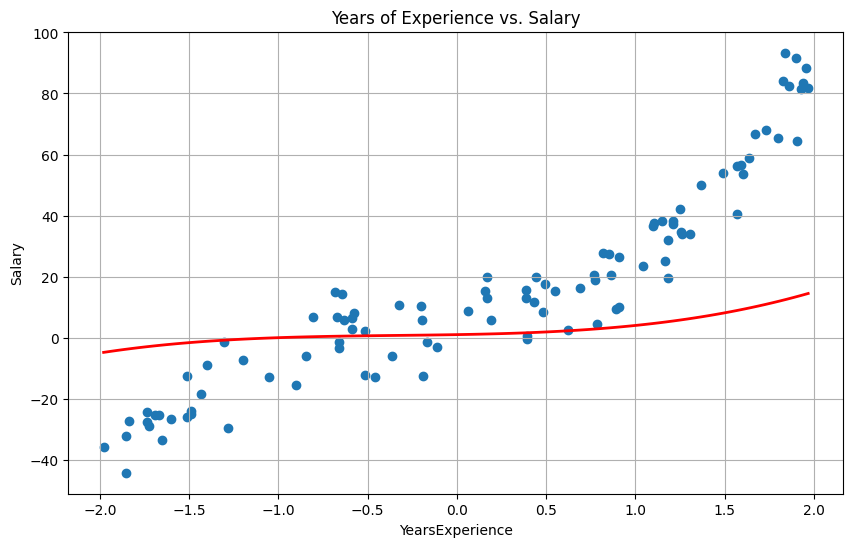

Final Parameters give an MSE Of [59.68514946], Parameters are A: [6.216817]  B: [4.50741903] C: [8.98885599] D: [5.49747668]


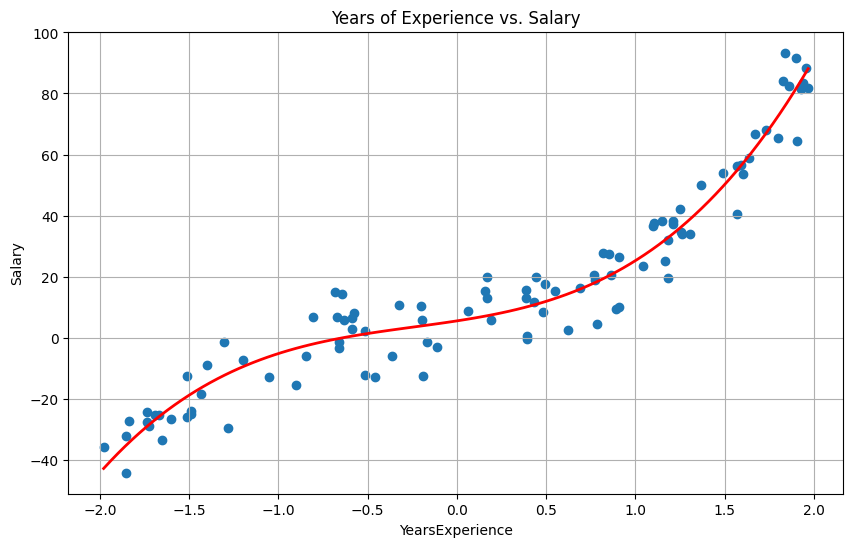

In [28]:
Alpha = 0.01
A = 1
B = 1
C = 1
D = 1

PlotCubic(A,B,C,D)

MaxIterations = 1000

MSE_History = [MSE(A,B,C,D)]

for I in range(MaxIterations):
  A = A - (Alpha * PartialDerivativeD1(A,B,C,D,3))
  B = B - (Alpha * PartialDerivativeD1(A,B,C,D,2))
  C = C - (Alpha * PartialDerivativeD1(A,B,C,D,1))
  D = D - (Alpha * PartialDerivativeD1(A,B,C,D,0))
  MSE_History.append(MSE(A,B,C,D))


print(f'Final Parameters give an MSE Of {MSE(A,B,C,D)}, Parameters are A: {A}  B: {B} C: {C} D: {D}')

PlotCubic(A,B,C,D)